In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import json
sns.set_style("ticks",{'axes.grid' : True})

In [1]:
FILE_PATH = './data/data_1.csv'
DTYPE_PATH = './result/data1/open_opt_params.json'
with open(DTYPE_PATH, 'r') as f:
    dtype = json.load(f)
df = pd.read_csv(FILE_PATH, dtype=dtype, parse_dates=['date'], index_col=0)
df[:3]

NameError: name 'json' is not defined

<Axes: xlabel='date'>

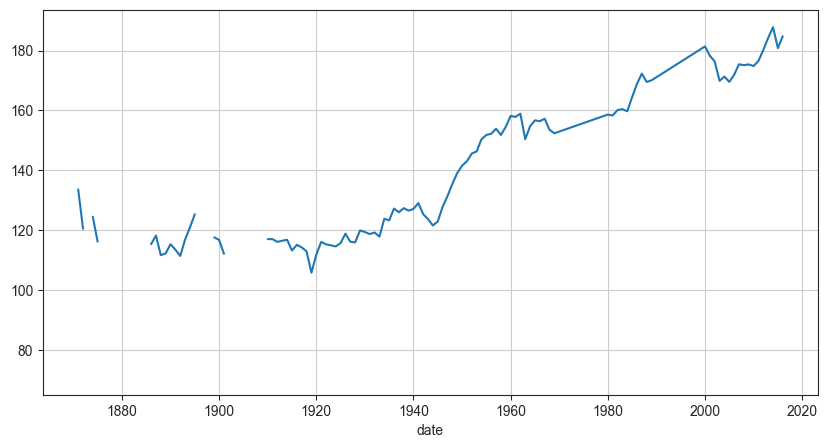

In [134]:
# 1. График показывает среднюю продолжительность матча за год
# из графика видно, что ранее матчи были короче 
plt.figure(figsize=(10,5))
df.groupby(df['date'].dt.year)["length_minutes"].mean().plot()

In [40]:
df[:3]

,date,day_of_week,v_score,h_score,day_night,length_minutes,v_assists,v_errors,h_assists,h_errors
0,1871-05-04,Thu,0,2,D,120.0,9.0,0.0,3.0,3.0
1,1871-05-05,Fri,20,18,D,145.0,13.0,10.0,20.0,10.0
2,1871-05-06,Sat,12,4,D,140.0,12.0,8.0,12.0,13.0


In [46]:
df.groupby(df['date'].dt.year)["v_score"].mean()

date
1871    9.811024
1872    8.508197
1873    7.507538
1874    6.383621
1875    5.962319
          ...   
2012    4.241975
2013    4.142328
2014    4.030453
2015    4.154385
2016    4.422158
Name: v_score, Length: 126, dtype: float64

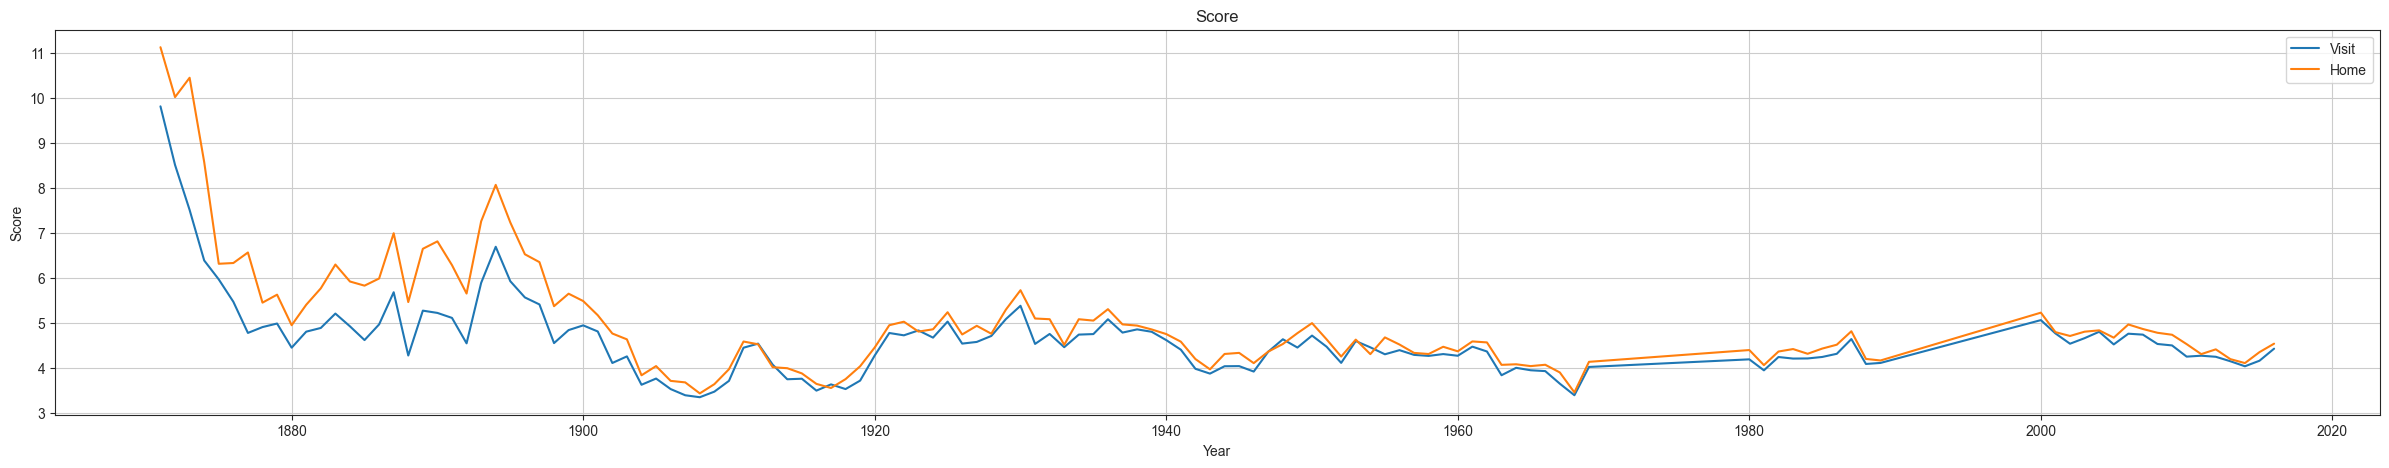

In [135]:
# 2. график для сравнения набранных очков за матч при игре дома (оранжевый) и в гостях (синий)
# можно отметить, что дома количество очков выше, чем в гостях
# также можно отметить, что до ~1900 годов количество очков было выше, чем сейчас
plt.figure(figsize=(30,5))
gr_obj_1 = df.groupby(df['date'].dt.year)["v_score"].mean()
gr_obj_2 = df.groupby(df['date'].dt.year)["h_score"].mean()
X_1 = gr_obj_1.index
Y_1 = gr_obj_1.values
X_2 = gr_obj_2.index
Y_2 = gr_obj_2.values
plt.plot(X_1, Y_1, label="Visit") # синий
plt.plot(X_2, Y_2, label="Home") # оранжевый
plt.title('Score')
plt.xlabel('Year')
plt.ylabel('Score')
plt.legend()

<Axes: title={'center': 'Count of games in day of weeks'}, xlabel='day_of_week'>

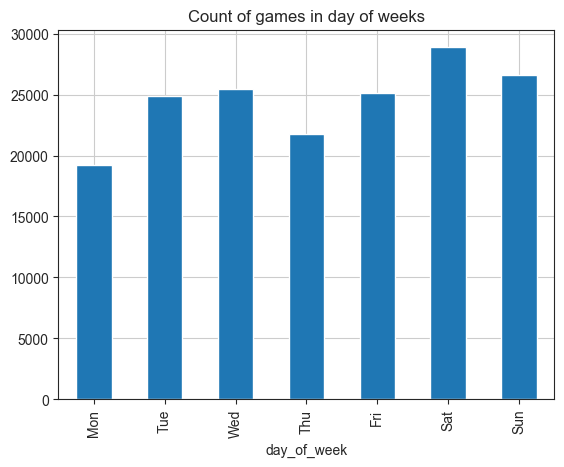

In [120]:
# 3. Столбчатая диаграмма, которая отображает количество матчей по дням недели
# стоит отметить, что больше всего игр было в выходной в Субботу, а меньше всего - в Понедельник
df['day_of_week'].value_counts()[['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']].plot(kind='bar', title='Count of games in day of weeks', x='Day of week', y='Count of games')

<Axes: title={'center': 'Count of day/night matches'}, ylabel='count'>

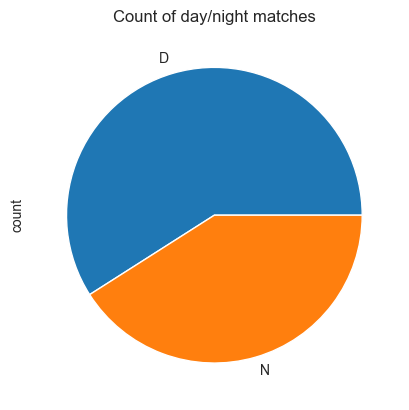

In [136]:
# 4. Круговая диаграмма количества дневных и ночных матчей.
df['day_night'].value_counts().plot(kind='pie', title='Count of day/night matches')

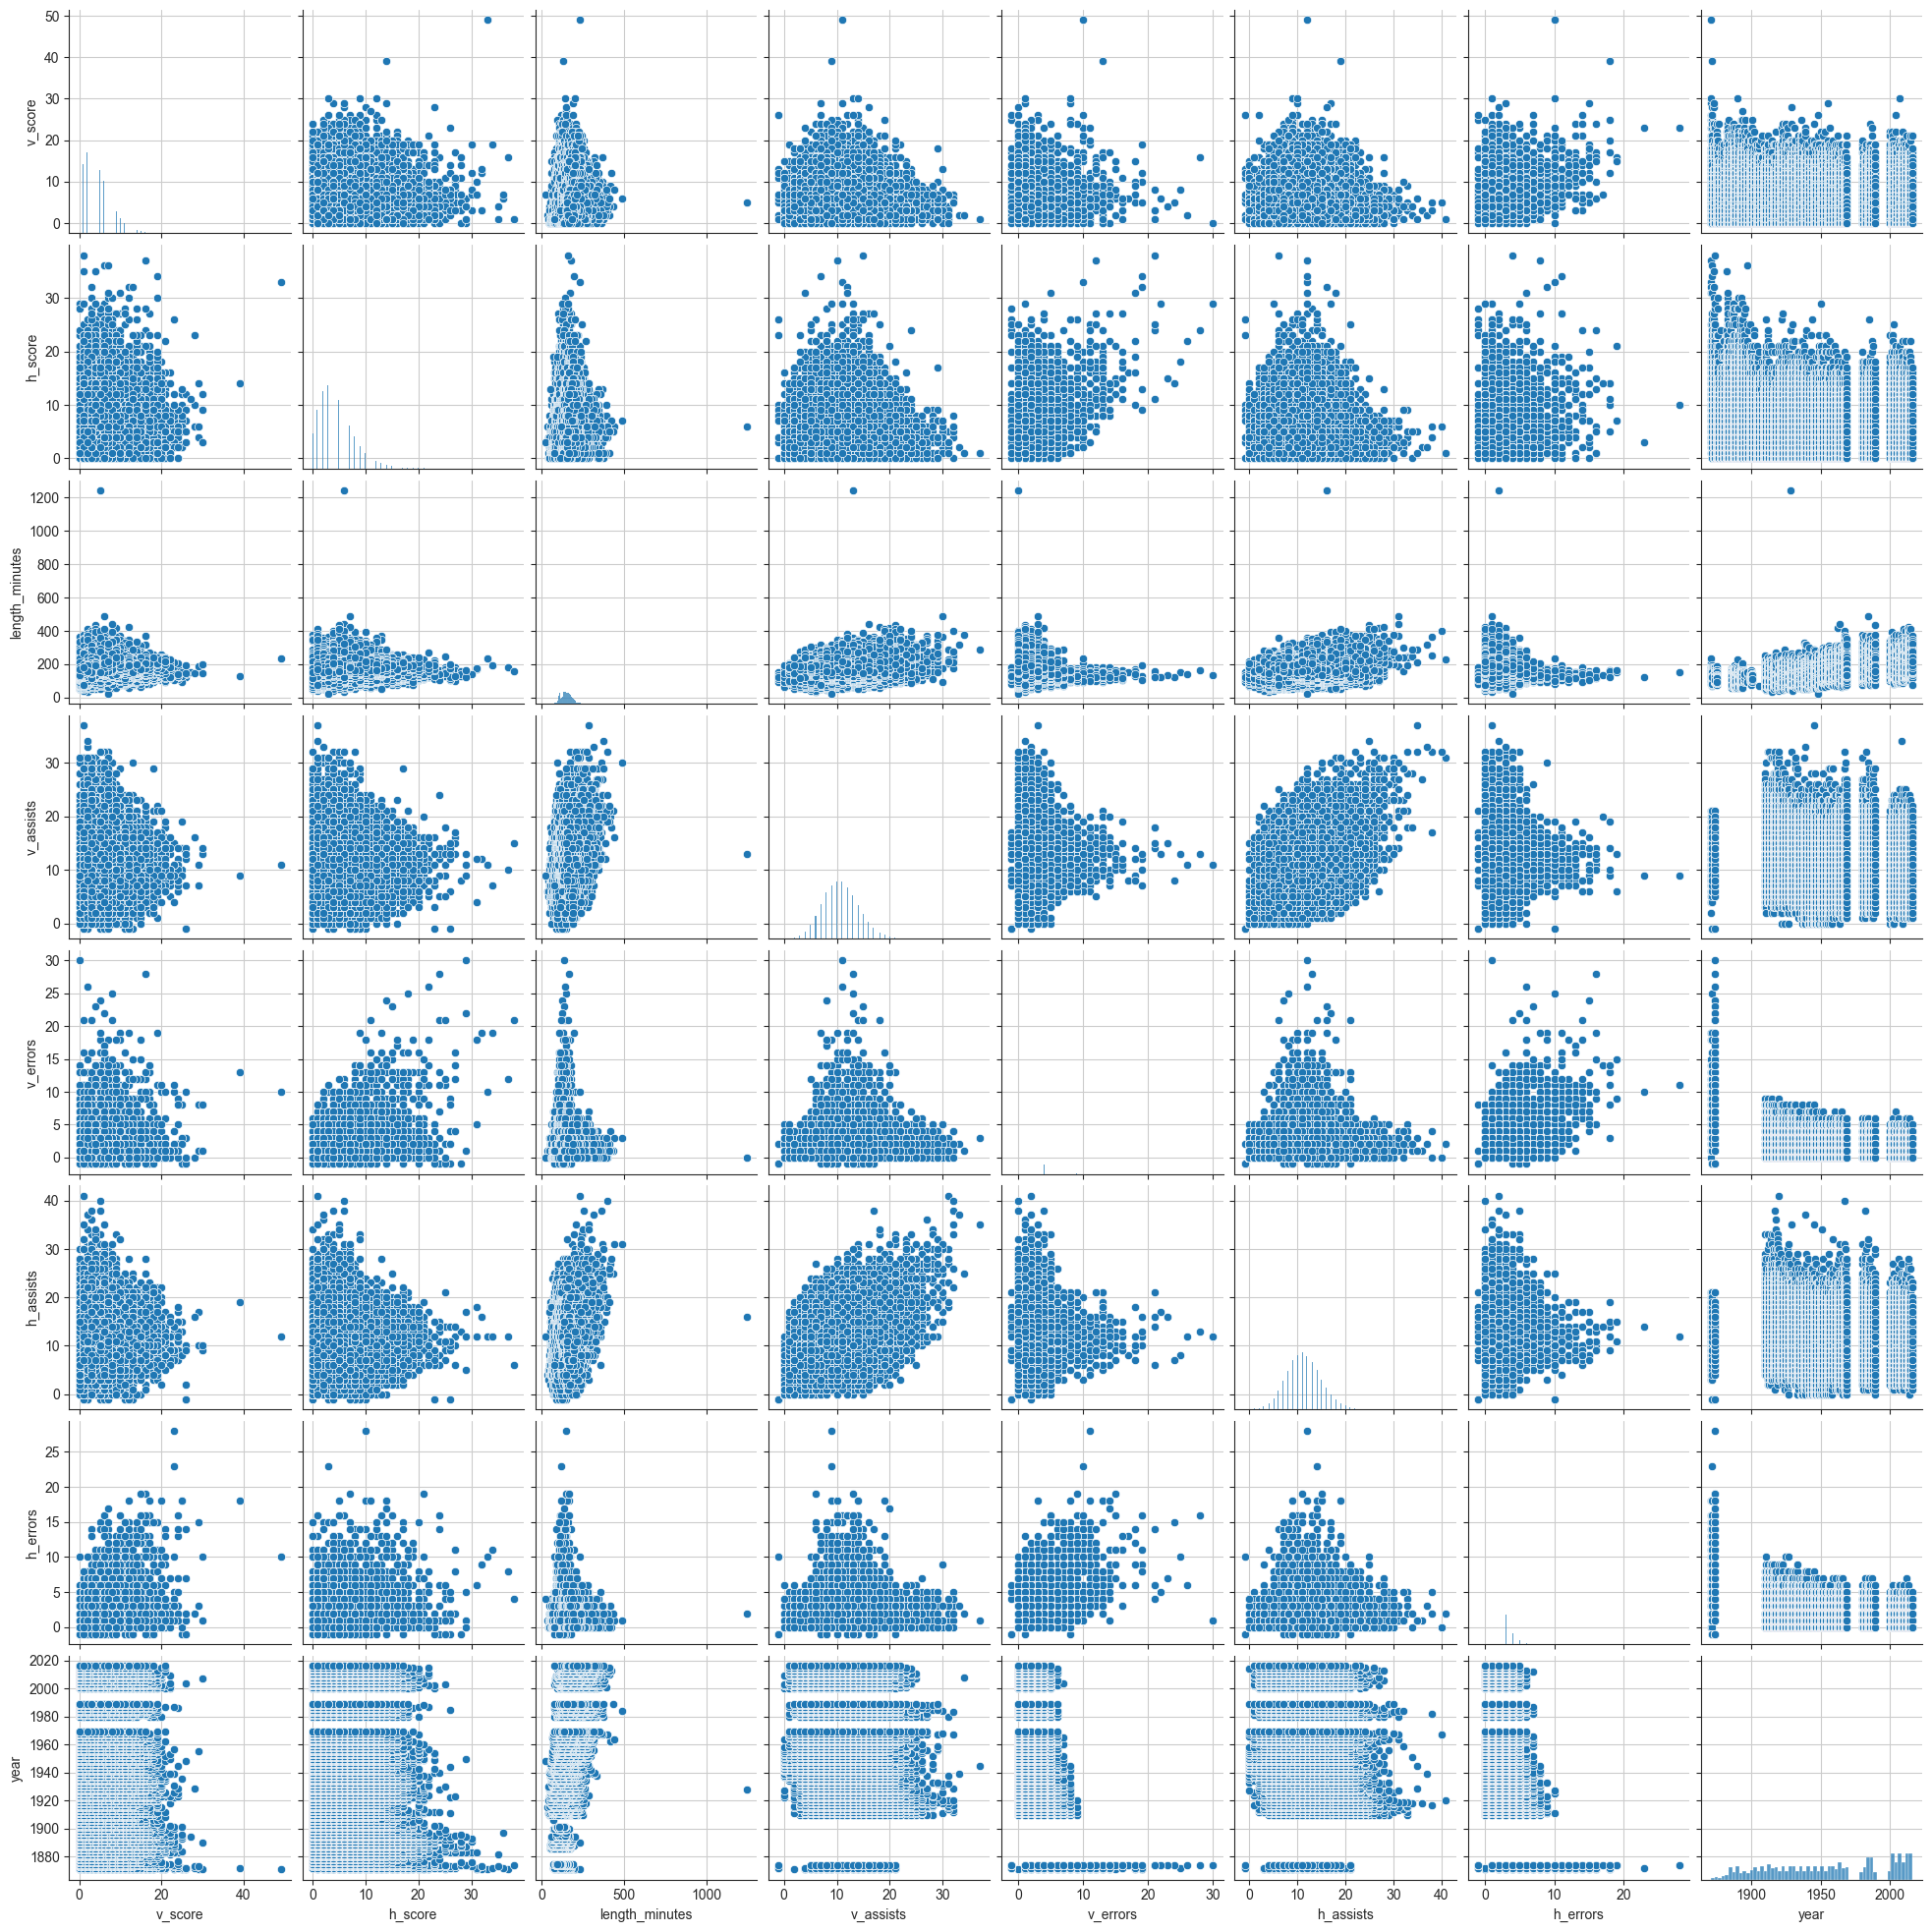

In [132]:
# 5. pairplot
sns.pairplot(df)

In [6]:
with open('./result/data2/open_opt_params.json', 'r') as f:
    dtype = json.load(f)
df_2 = pd.read_csv('./data/data_2.csv', dtype=dtype, index_col=0)

In [7]:
df_2

,msrp,isNew,brandName,dealerID,vf_ABS,vf_FuelTypePrimary,vf_ModelYear,vf_Seats,vf_TopSpeedMPH,vf_TransmissionStyle
0,1498,False,MITSUBISHI,7514,NaN,NaN,2002.0,NaN,NaN,NaN
1,10589,False,NISSAN,7514,NaN,Gasoline,2016.0,NaN,NaN,NaN
2,11992,False,FORD,7514,NaN,Gasoline,2014.0,NaN,NaN,NaN
3,12387,False,CHEVROLET,7514,Standard,Gasoline,2017.0,5.0,130.0,Automatic
4,41659,True,FORD,7514,Standard,Gasoline,2019.0,6.0,NaN,Automatic
...,...,...,...,...,...,...,...,...,...,...
5695010,34177,False,LAND ROVER,3136,Standard,Gasoline,2019.0,NaN,124.0,Automatic
5695011,49776,False,LAND ROVER,3136,Standard,Gasoline,2020.0,5.0,NaN,Automatic
5695012,61000,False,MERCEDES-BENZ,3136,Standard,Gasoline,2019.0,7.0,NaN,Automatic
5695013,24240,True,NISSAN,3136,NaN,Gasoline,2020.0,NaN,NaN,NaN


In [37]:
df_2.value_counts(['isNew', 'brandName'])

isNew  brandName       
False  FORD                568283
       CHEVROLET           561409
True   CHEVROLET           328804
False  JEEP                232077
       TOYOTA              229611
                            ...  
       SPORTSCOACH              1
True   YAMAHA                   1
False  HYUNDAI GENESIS          1
       SHERMAN + REILLY         1
       ROYALS                   1
Name: count, Length: 161, dtype: int64

In [36]:
df_2.groupby(['isNew', 'brandName']).describe()['msrp']['count']

C:\Users\Andrew\AppData\Local\Temp\ipykernel_6820\3389706857.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_2.groupby(['isNew', 'brandName']).describe()['msrp']['count']


isNew  brandName                     
False  ACURA                              24480.0
       ALFA ROMEO                          1577.0
       AUDI                               52090.0
       BMW                               105227.0
       BUICK                              80659.0
                                           ...   
True   FREIGHTLINER                           1.0
       LOTUS                                  2.0
       FIRST UNITED INDUSTRIAL FOSHAN         2.0
       CRUISERS MFG INC (CMI)                 1.0
       OPEL                                  14.0
Name: count, Length: 161, dtype: float64

<Axes: xlabel='vf_ModelYear'>

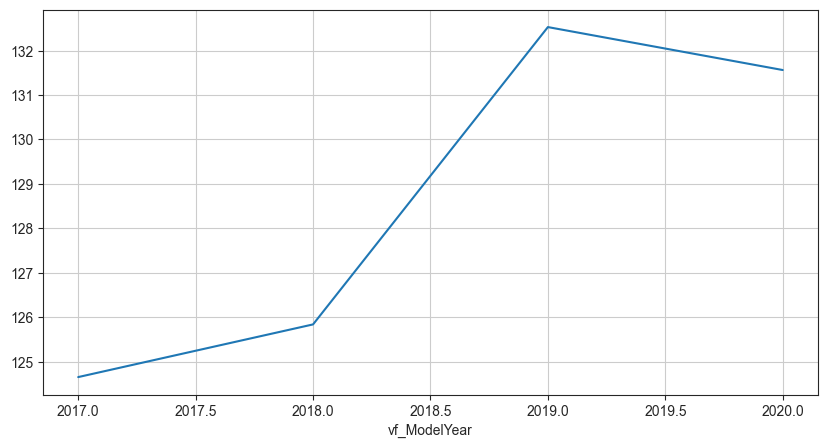

In [41]:
# 1. График показывает среднюю максимальную скорость автомобилей, произведённых в определённый год
# предполагал, что максимальная скорость авто должна расти со временем, в целом выглядит всё примерно так, но как-то не явно
plt.figure(figsize=(10,5))
df_2.groupby(df_2['vf_ModelYear'])["vf_TopSpeedMPH"].mean().plot()